In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [77]:
path = 'startup_funding.csv'

In [78]:
df = pd.read_csv(path)

### Question

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [79]:
test3 = df.copy()

In [80]:
#correcting the spelling in investors name ignoring undisclosed investors
test3['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test3['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [81]:
#correcting major startup names
test3['StartupName'].replace("Ola Cabs", "Ola", inplace = True)
test3['StartupName'].replace("OyoRooms", "Oyo", inplace = True)
test3['StartupName'].replace("Oyorooms", "Oyo", inplace = True)
test3['StartupName'].replace("OYO Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Olacabs", "Ola", inplace = True)
test3['StartupName'].replace("Flipkart.com", "Flipkart", inplace = True)
test3['StartupName'].replace("Oyo Rooms", "Oyo", inplace = True)
test3['StartupName'].replace("Paytm Marketplace", "Paytm", inplace = True)

In [82]:
#filtering the na
test3.dropna(inplace = True, subset = ["InvestorsName", "StartupName"])
test3.reset_index(drop = True, inplace = True)

In [83]:
#function to create dictionary of investor name making investment to different startups
def Create(startup_name, Investor_name):
    cnt = {}
    #cnt holds investors name as key and the number of investments as value
    name_startup = {}
    #name_startup holds the investors name as key and list of different companies in which it invests as value
    n = len(Investor_name)
    for idx in range(n):
        i = Investor_name[idx].strip()
        name = startup_name[idx].strip()
        if ',' not in i and i != "":
            if name_startup.get(i) is None: #no startup is still funded by this investor
                cnt[i] = 1
                li = []
                li.append(name)
                name_startup[i] = li   
            else:
                li = name_startup[i]
                if name not in li:             #checking the given startup has been invested before or not
                    cnt[i] = cnt.get(i, 0) + 1
                    li.append(name)
                    name_startup[i]
            
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                k = j.strip()
                if k != "":
                    if name_startup.get(k) is None:  #no startup is still funded by this investor
                        cnt[k] = 1
                        li = []
                        li.append(name)
                        name_startup[k] = li
                    else:
                        li = name_startup[k]
                        if name not in li:         #checking the given startup has been invested before or not
                            cnt[k] = cnt.get(k, 0) + 1
                            li.append(name)
                            name_startup[k] = li 
                
    return cnt

In [84]:
#making dictionary
dictionary = Create(test3['StartupName'], test3['InvestorsName'])

In [85]:
#build pandas dataframe
diff_invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

In [86]:
#sort in descending order on the basis of values
diff_invest = diff_invest.sort_values(by = [0], ascending = False)

In [87]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times in different startups
for i in range(5):
    x.append(diff_invest.index[i])
    y.append(diff_invest.values[i][0])

In [88]:
#printing the top investors who invested who invested most number of times in different startups
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1

List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Indian Angel Network
5. Blume Ventures


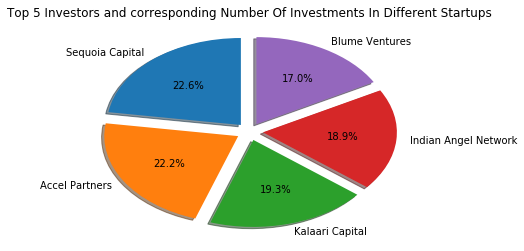

Name Of Investors  Total Number Of Investments
0       Sequoia Capital                           48
1        Accel Partners                           47
2       Kalaari Capital                           41
3  Indian Angel Network                           40
4        Blume Ventures                           36

In [89]:
#plot
plt.pie(y, labels = x,startangle=90, shadow = True, explode = (0.1, 0.1, 0.1, 0.1,0.1), autopct = "%.1f%%")
plt.grid()
plt.xticks(rotation=40)
plt.title("Top 5 Investors and corresponding Number Of Investments In Different Startups")
plt.show()

#pandas frame for Investors name and corresponding Number of Investments made by them in different startups
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data